In [1]:
from IPython.display import clear_output
!pip install visualkeras
clear_output()

In [2]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2
import visualkeras

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras.layers import Layer,Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model

SEED = 50
BATCH_SIZE = 32

2024-02-07 14:28:24.156578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Preprocessing
# Creating new folders

os.mkdir(os.path.join('/Users/telan/kaggle/',  'matiz_black_png'))
os.mkdir(os.path.join('/Users/telan/kaggle/',  'matiz_blue_png'))
os.mkdir(os.path.join('/Users/telan/kaggle/',  'matiz_red_png'))

os.mkdir(os.path.join('/Users/telan/kaggle/',  'rio_black_png'))
os.mkdir(os.path.join('/Users/telan/kaggle/',  'rio_blue_png'))
os.mkdir(os.path.join('/Users/telan/kaggle/',  'rio_red_png'))

os.mkdir(os.path.join('/Users/telan/kaggle/',  'tiggo_black_png'))
os.mkdir(os.path.join('/Users/telan/kaggle/',  'tiggo_blue_png'))
os.mkdir(os.path.join('/Users/telan/kaggle/',  'tiggo_red_png'))

FileExistsError: [Errno 17] File exists: '/Users/telan/kaggle/matiz_black_png'

In [4]:
# Converting .jpg images to .png images

def new_images_path(main_path, target_path):
    for i in os.listdir(main_path):
        img = cv2.imread((os.path.join(main_path,i)))
        cv2.imwrite(os.path.join(target_path, i[:-3] + 'png'), img)

In [13]:
new_images_path('Ass02/matiz black', 'kaggle/matiz_black_png')
new_images_path('Ass02/matiz blue', 'kaggle/matiz_blue_png')
new_images_path('Ass02/matiz red', 'kaggle/matiz_red_png')

new_images_path('Ass02/rio black', 'kaggle/rio_black_png')
new_images_path('Ass02/rio blue', 'kaggle/rio_blue_png')
new_images_path('Ass02/rio red', 'kaggle/rio_red_png')

new_images_path('Ass02/tiggo black', 'kaggle/tiggo_black_png')
new_images_path('Ass02/tiggo blue', 'kaggle/tiggo_blue_png')
new_images_path('Ass02/tiggo red', 'kaggle/tiggo_red_png')

In [5]:
# Creating Datasets
# Creating main dataframe contains image paths and their classes.

def create_images_list(path):
    full_path = []
    images = os.listdir(path)
    for i in tqdm(images, desc = 'images' ):
        full_path.append(os.path.join(path, i))
        
    return full_path

matiz_black_data = create_images_list('kaggle/matiz_black_png')
matiz_blue_data = create_images_list('kaggle/matiz_blue_png')
matiz_red_data = create_images_list('kaggle/matiz_red_png')

rio_black_data = create_images_list('kaggle/rio_black_png')
rio_blue_data = create_images_list('kaggle/rio_blue_png')
rio_red_data = create_images_list('kaggle/rio_red_png')

tiggo_black_data = create_images_list('kaggle/tiggo_black_png')
tiggo_blue_data = create_images_list('kaggle/tiggo_blue_png')
tiggo_red_data = create_images_list('kaggle/tiggo_red_png')


# look-up table
classes = {0:'matiz_black', 1 : 'matiz_blue', 2: 'matiz_red',
                   3:'rio_black', 4 : 'rio_blue', 5: 'rio_red',
                   6:'tiggo_black', 7 : 'tiggo_blue', 8: 'tiggo_red' }

data_df = pd.concat([
    pd.DataFrame({ 'img': matiz_black_data, 'label': 0 }),
    pd.DataFrame({ 'img': matiz_blue_data, 'label': 1 }),
    pd.DataFrame({ 'img': matiz_red_data, 'label': 2 }),
    pd.DataFrame({ 'img': rio_black_data, 'label': 3 }),
    pd.DataFrame({ 'img': rio_blue_data, 'label': 4 }),
    pd.DataFrame({ 'img': rio_red_data, 'label': 5 }),
    pd.DataFrame({ 'img': tiggo_black_data, 'label': 6 }),
    pd.DataFrame({ 'img': tiggo_blue_data, 'label': 7 }),
    pd.DataFrame({ 'img': tiggo_red_data, 'label': 8 }) ], ignore_index = True)

data_df = shuffle(data_df).reset_index(drop = True)


images:   0%|          | 0/235 [00:00<?, ?it/s]

images:   0%|          | 0/334 [00:00<?, ?it/s]

images:   0%|          | 0/346 [00:00<?, ?it/s]

images:   0%|          | 0/306 [00:00<?, ?it/s]

images:   0%|          | 0/262 [00:00<?, ?it/s]

images:   0%|          | 0/431 [00:00<?, ?it/s]

images:   0%|          | 0/286 [00:00<?, ?it/s]

images:   0%|          | 0/273 [00:00<?, ?it/s]

images:   0%|          | 0/262 [00:00<?, ?it/s]

In [6]:
# Creating random 4 sample from a dataframe


def create_img_label_sample(data, index):
    
    img = cv2.imread(data['img'][index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = classes[data_df['label'][index]]
    
    return img, label

def create_random_samples(data):
    
    idx1,idx2,idx3,idx4 =np.random.permutation(data.shape[0])[:4]

    fig, axs = plt.subplots(1,4, figsize = (12,5), dpi = 300)
    
    img1, label1 = create_img_label_sample(data, idx1)
    img2, label2 = create_img_label_sample(data, idx2)
    img3, label3 = create_img_label_sample(data, idx3)
    img4, label4 = create_img_label_sample(data, idx4)
    
    axs[0].imshow(img1)
    axs[0].axis('off')
    axs[0].set_title(label1)
    
    axs[1].imshow(img2)
    axs[1].set_title(label2)
    axs[1].axis('off')

    axs[2].imshow(img3)
    axs[2].set_title(label3)
    axs[2].axis('off')

    axs[3].imshow(img4)
    axs[3].set_title(label4)
    axs[3].axis('off')
    
    plt.show()

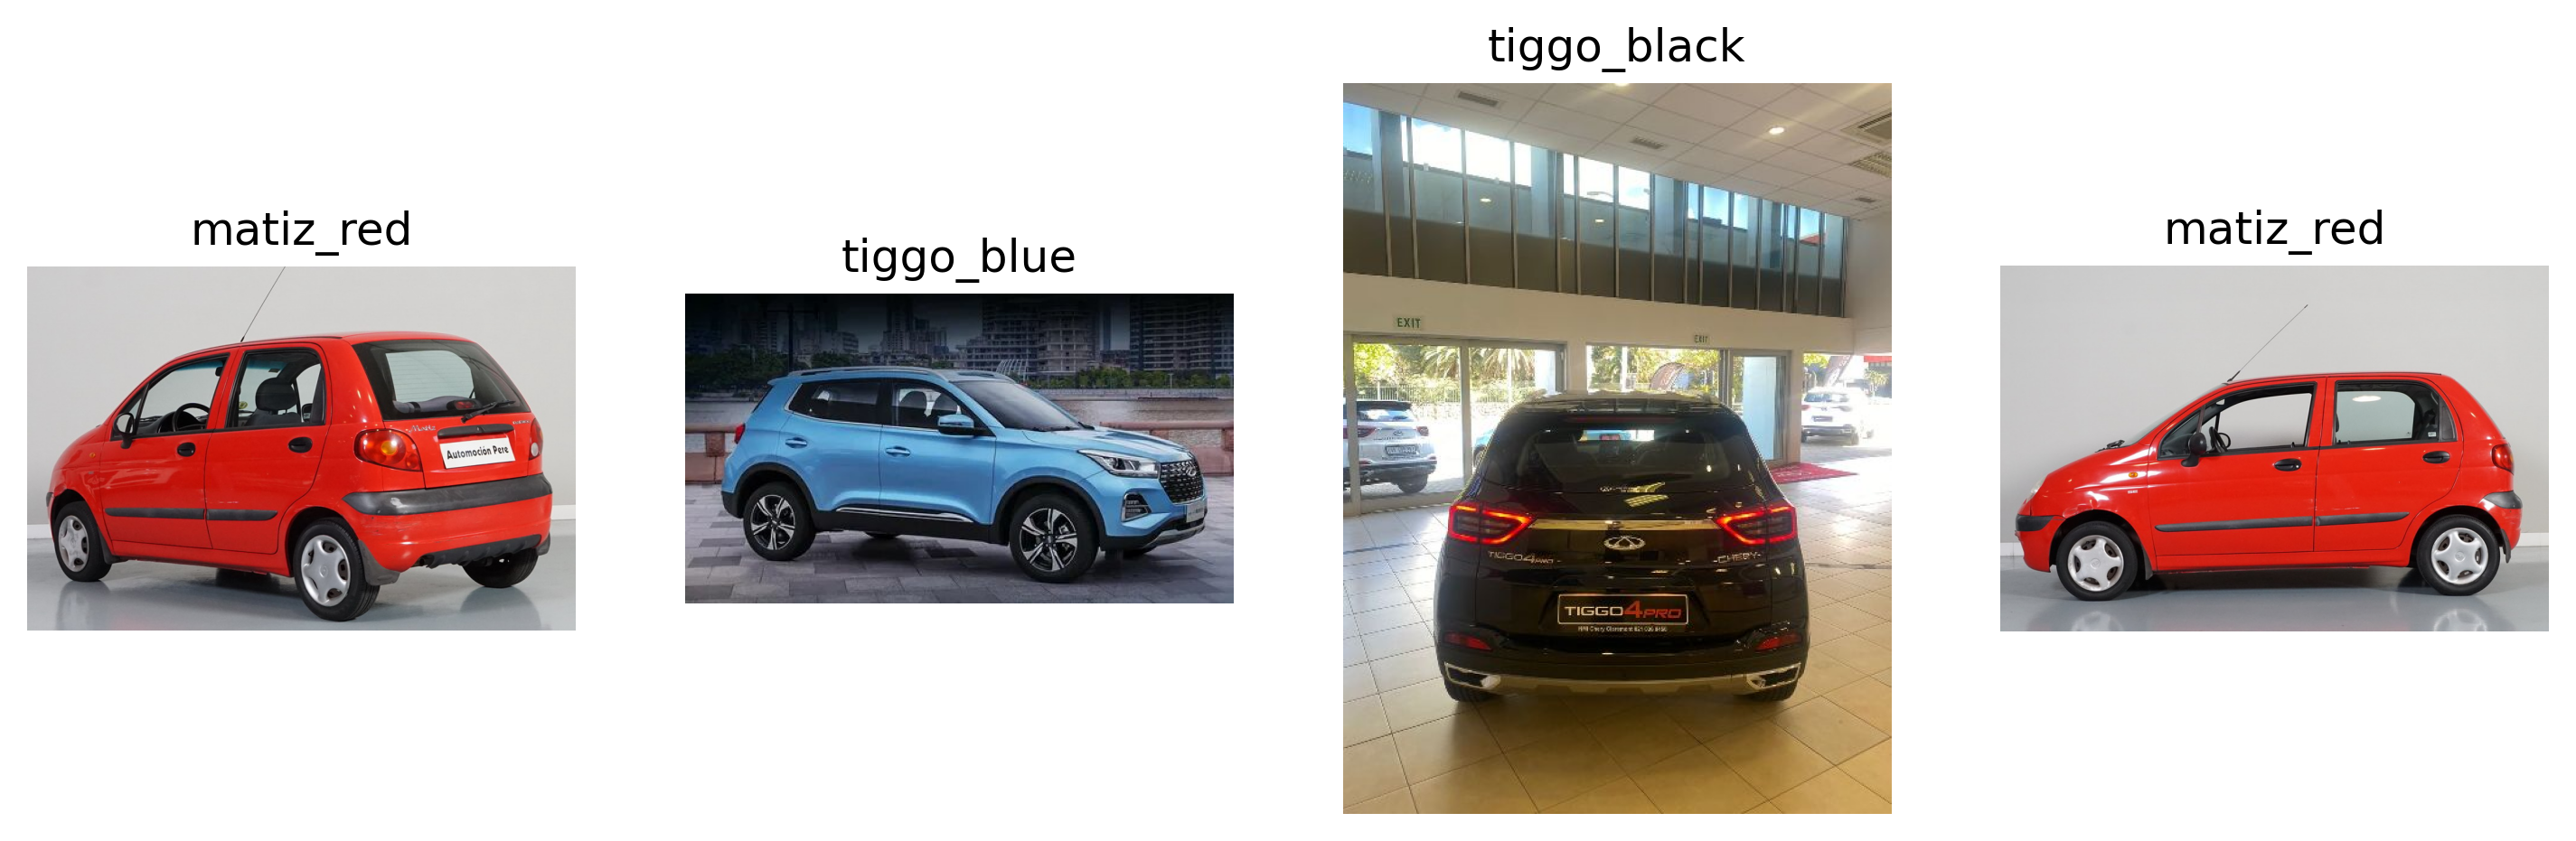

In [7]:
create_random_samples(data_df)

In [22]:
# Data Collection and Pre-processing for Standford Dataset
def load_images_and_labels(dataset_path, folder):
    images = []
    labels = []

    for folder in os.listdir(dataset_path):
        label = folder
        folder_path = os.path.join(dataset_path, folder)
        for img_file in os.listdir(folder_path):
            
            try:
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (224, 224))  # Resize images to a fixed size
                images.append(img)
                labels.append(label)

            except Exception as e:
                print(str(e))
    
    return np.array(images), np.array(labels)

# Combine datasets
dataset1_images, dataset1_labels = load_images_and_labels('Ass02', 'cars_train')
dataset2_images, dataset2_labels = load_images_and_labels('Ass02','cars_test')

# Concatenate datasets
images = np.concatenate((dataset1_images, dataset2_images), axis=0)
labels = np.concatenate((dataset1_labels, dataset2_labels), axis=0)


OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [8]:
X_data, X_test, y_data, y_test = train_test_split(np.array(data_df['img']),np.array( data_df['label']), test_size = 0.2, random_state = SEED )

X_train, X_validation, y_train, y_validation = train_test_split( X_data, y_data ,test_size = 0.2, random_state = SEED+1)

print("train images: ", X_train.shape[0])
print("validation images: ", X_validation.shape[0])
print("test images: ", X_test.shape[0])

train images:  1750
validation images:  438
test images:  547


In [9]:
def img_preprocessing(image, label):

    img = tf.io.read_file(image)
    img = tf.io.decode_png(img, channels= 3)
    img = tf.image.resize(img, size = (100, 100))
    img = tf.cast(img, tf.float32)/255.0

    return img, label
    
    
def img_augmentation(image, label):
    img = tf.image.random_flip_left_right(image)
    img = tf.image.random_flip_up_down(img)
    
    return img,label

In [10]:
# Creating dataset loaders

train_loader = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = (train_loader
                 .map(img_preprocessing)
                 .map(img_augmentation)
                 .batch(BATCH_SIZE)
                 .prefetch(BATCH_SIZE))



validation_loader = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))
validation_dataset = (validation_loader
                 .map(img_preprocessing)
                 .map(img_augmentation)
                 .batch(BATCH_SIZE)
                 .prefetch(BATCH_SIZE))



test_loader = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = (test_loader
                 .map(img_preprocessing)
                 .batch(BATCH_SIZE)
                 .prefetch(BATCH_SIZE))

In [11]:
# Creating a convolution block class

class ConvBlock(Layer):
    def __init__(self, filters, kernel_size, activation = 'relu', batch_norm = False, **kwargs):
        super(ConvBlock, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation
        self.batch_norm = batch_norm
        
        self.conv = Conv2D(filters, kernel_size, padding = 'same')
        self.batch = BatchNormalization()
        self.act = Activation(activation)
        self.pool = MaxPooling2D()
    
    
    def call(self, inputs):
        X = self.conv(inputs)
        if self.batch_norm:
            X = self.batch(X)
            X = self.act(X)
            X = self.pool(X)
            return X
        else:
            X = self.act(X)
            X = self.pool(X)
            return X
        
    
    def get_config():
        base_config = super().get_config()
        
        
        return {
            **base_config,
            "filters" : self.filters,
            "kernel_size": self.kernel_size,
            "activation" : self.act
        }

In [12]:
# CNN Model
inp = Input(shape = (100, 100, 3))
C = ConvBlock(32, 2, activation = 'relu', batch_norm =True, name = 'CONV_BLOCK_1')(inp)
C = ConvBlock(64, 2, activation = 'relu', batch_norm =True, name = 'CONV_BLOCK_2')(C)
C = ConvBlock(128, 2, activation = 'relu', batch_norm =True, name = 'CONV_BLOCK_3')(C)
C = ConvBlock(256, 2, activation = 'relu', batch_norm =True, name = 'CONV_BLOCK_4')(C)
C = GlobalAveragePooling2D()(C)
C = Dense(128, activation = 'relu')(C)
C = Dropout(0.6)(C)
out = Dense(9, activation = 'softmax')(C)

model = Model(inputs = inp, outputs = out)
model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam() , loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
my_callbacks = [tf.keras.callbacks.EarlyStopping(min_delta = 0.0001, patience = 15), 
               tf.keras.callbacks.ReduceLROnPlateau(factor = 0.2, patience = 5) ]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 CONV_BLOCK_1 (ConvBlock)    (None, 50, 50, 32)        544       
                                                                 
 CONV_BLOCK_2 (ConvBlock)    (None, 25, 25, 64)        8512      
                                                                 
 CONV_BLOCK_3 (ConvBlock)    (None, 12, 12, 128)       33408     
                                                                 
 CONV_BLOCK_4 (ConvBlock)    (None, 6, 6, 256)         132352    
                                                                 
 global_average_pooling2d (  (None, 256)               0         
 GlobalAveragePooling2D)                                         
                                                             

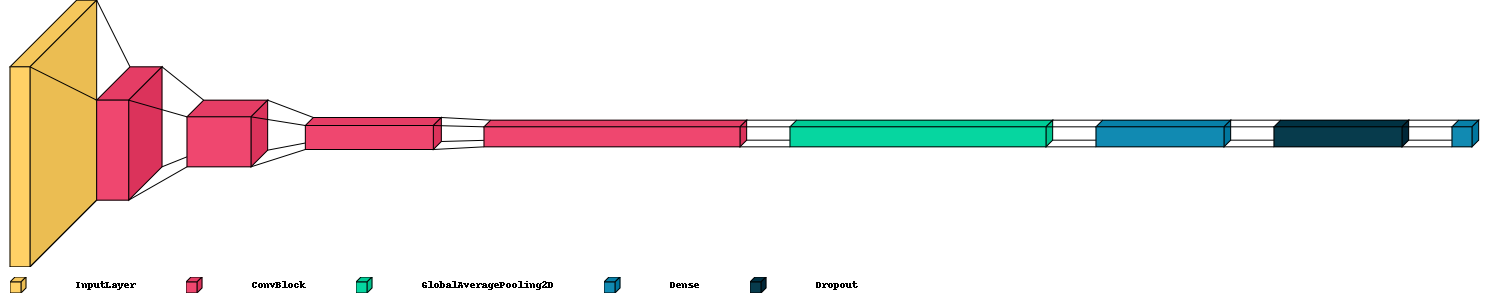

<Figure size 640x480 with 0 Axes>

In [13]:
#Plotting the model

plt.figure(dpi = 100)
visualkeras.layered_view(model, spacing = 50,  scale_z = 1, scale_xy = 2 , legend=True )

In [14]:
# Training
hist = model.fit(train_dataset, validation_data= validation_dataset, epochs = 10 ,  batch_size = BATCH_SIZE, callbacks = my_callbacks )

Epoch 1/10
55/55 [==============================] - 33s 527ms/step - loss: 1.7266 - acc: 0.3251 - val_loss: 2.2235 - val_acc: 0.1027 - lr: 0.0010
Epoch 2/10
55/55 [==============================] - 33s 588ms/step - loss: 1.3613 - acc: 0.4451 - val_loss: 2.2548 - val_acc: 0.0959 - lr: 0.0010
Epoch 3/10
55/55 [==============================] - 30s 542ms/step - loss: 1.2221 - acc: 0.4829 - val_loss: 2.4173 - val_acc: 0.0982 - lr: 0.0010
Epoch 4/10
55/55 [==============================] - 30s 542ms/step - loss: 1.1646 - acc: 0.5086 - val_loss: 2.2424 - val_acc: 0.1324 - lr: 0.0010
Epoch 5/10
55/55 [==============================] - 30s 535ms/step - loss: 1.0893 - acc: 0.5480 - val_loss: 1.9709 - val_acc: 0.2740 - lr: 0.0010
Epoch 6/10
55/55 [==============================] - 29s 530ms/step - loss: 1.0754 - acc: 0.5491 - val_loss: 1.8825 - val_acc: 0.2900 - lr: 0.0010
Epoch 7/10
55/55 [==============================] - 30s 543ms/step - loss: 1.0024 - acc: 0.5811 - val_loss: 1.8601 - val_acc

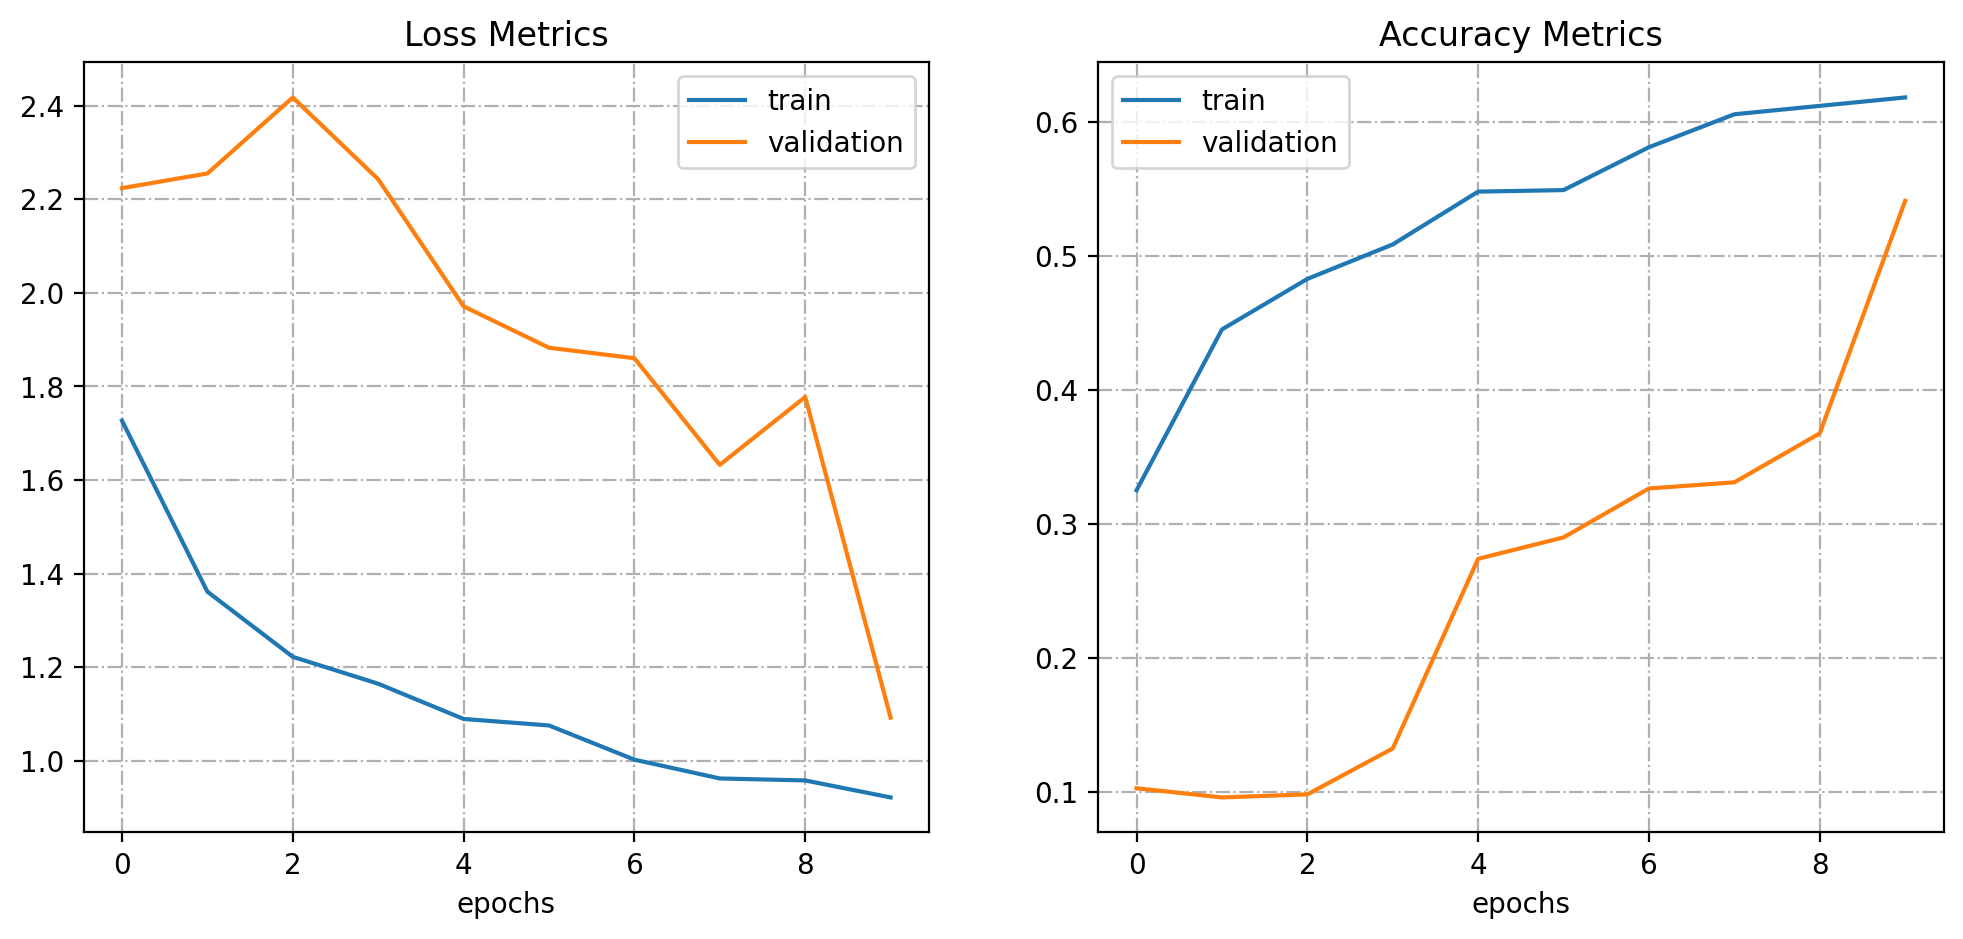

In [15]:
# Training Results
fig, axs = plt.subplots(1,2, figsize = (12,5), dpi = 200)

axs[0].grid(linestyle = 'dashdot')
axs[0].set_title("Loss Metrics")
axs[0].set_xlabel('epochs')
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])
axs[0].legend(['train', 'validation'])

axs[1].grid(linestyle = 'dashdot')
axs[1].set_title('Accuracy Metrics')
axs[1].set_xlabel('epochs')
axs[1].plot(hist.history['acc'])
axs[1].plot(hist.history['val_acc'])
axs[1].legend(['train', 'validation'])

18/18 [==============================] - 2s 117ms/step - loss: 1.0409 - acc: 0.5338
Test Accuracy: 53.38 %
18/18 [==============================] - 4s 169ms/step


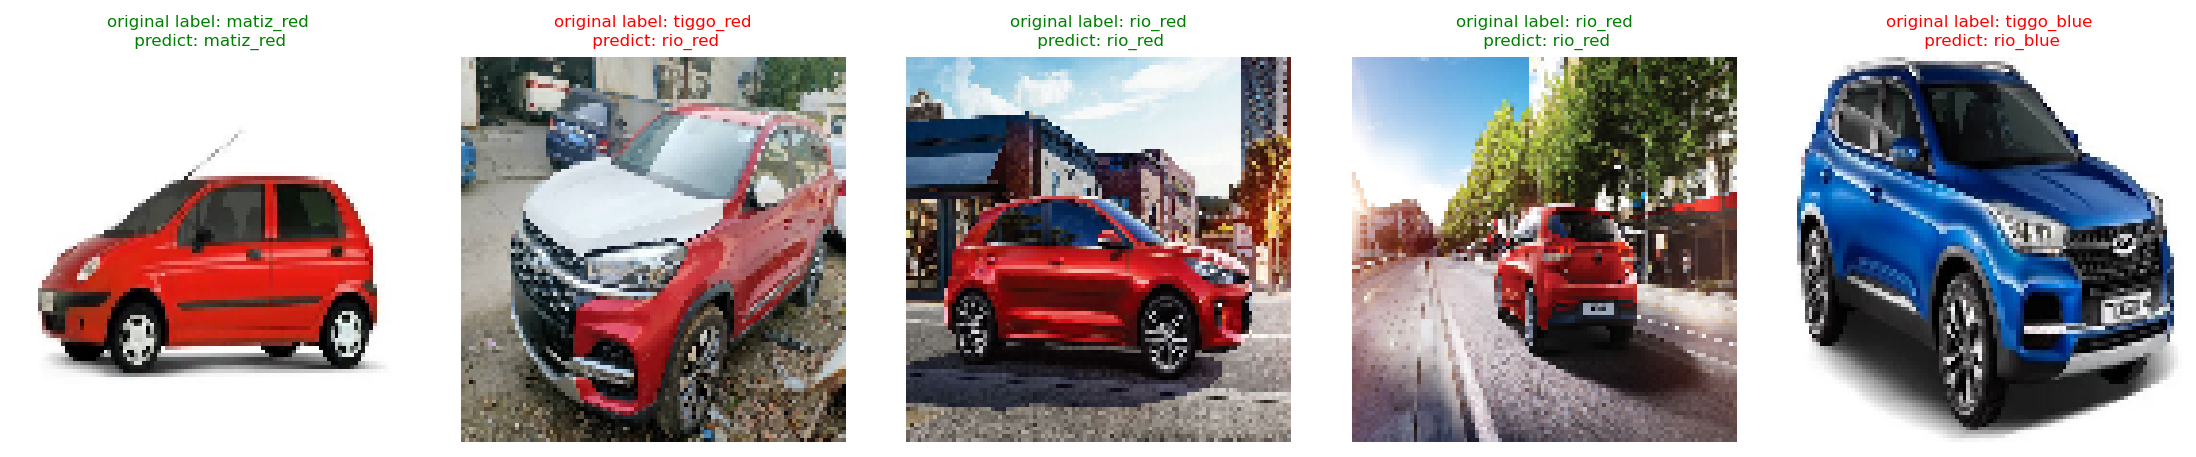

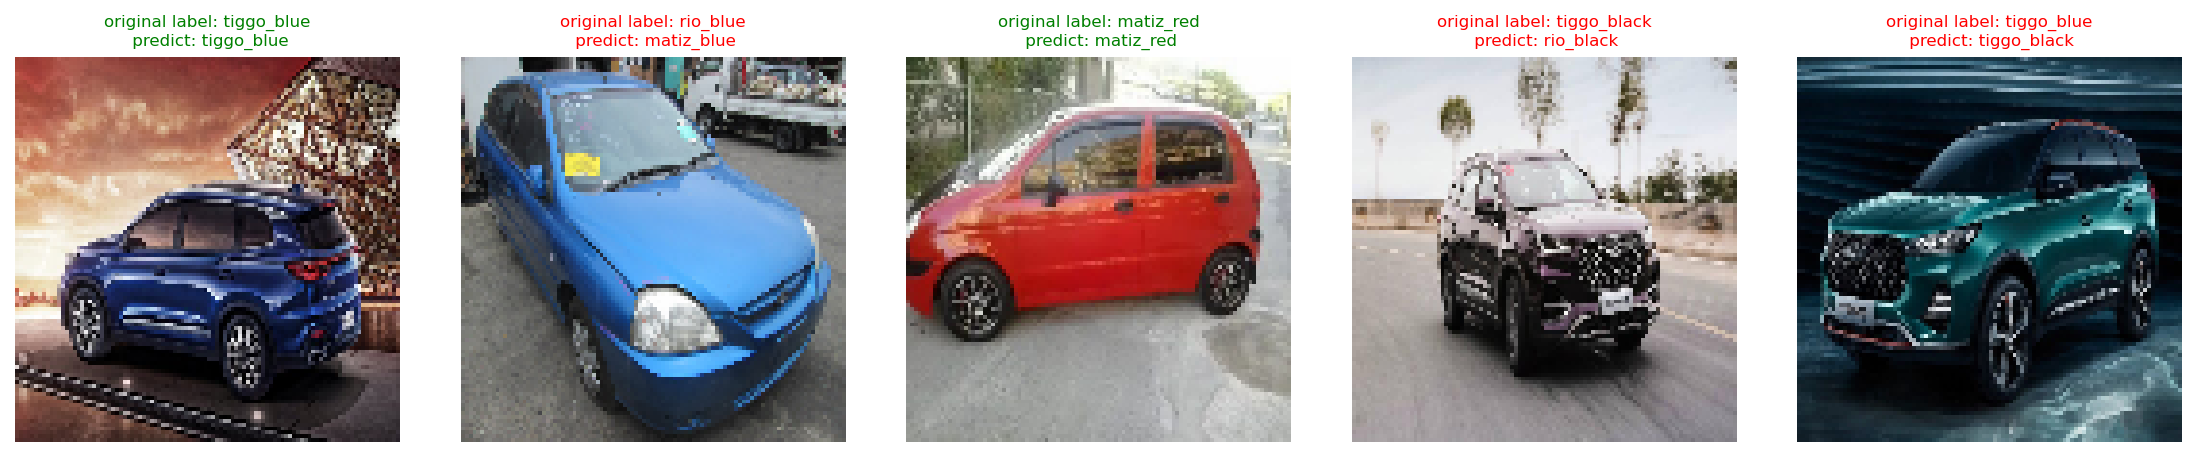

In [16]:
# Test Prediction and Evaluation
test_eval = model.evaluate(test_dataset)
print('Test Accuracy: {0:.2f} %'.format(test_eval[1] * 100))

# Test set prediction
test_take1 =  test_dataset.take(-1)
test_take1_ = list(test_take1)
pred = model.predict(test_take1)
pred = np.argmax(pred, axis = 1)

# A function that creating 5 random images in the test set and predictions

# Red title -> a false prediction
# Green title -> a true prediction

def random_test_sample_with_prediction():
    idxs = np.random.permutation(len(pred))[:5]
    batch_idx = idxs // BATCH_SIZE
    image_idx = idxs-batch_idx * BATCH_SIZE
    idx = idxs
    

    fig, axs = plt.subplots(1,5, figsize = (15,3) ,dpi = 150)
    
    for i in range(5):
        image = test_take1_[batch_idx[i]][0][image_idx[i]]
        label = test_take1_[batch_idx[i]][1][image_idx[i]]
        pred_label = pred[idx[i]] 
        
        axs[i].imshow(image)
        axs[i].axis('off')
        
        if (label.numpy() == pred_label):
            axs[i].set_title("original label: " + classes[label.numpy()] + "\n predict: " + classes[pred_label], fontsize = 8, color = 'green')
        else:
            axs[i].set_title("original label: " + classes[label.numpy()] + "\n predict: " + classes[pred_label], fontsize = 8, color = 'red')
    
    plt.tight_layout()
    plt.show()
    
random_test_sample_with_prediction()
random_test_sample_with_prediction()

In [17]:
# Classification Report
clf = classification_report(y_test , pred, target_names = list(classes.values()) )
print(clf)

              precision    recall  f1-score   support

 matiz_black       0.32      0.82      0.46        40
  matiz_blue       0.58      0.92      0.71        62
   matiz_red       0.66      0.90      0.76        62
   rio_black       0.40      0.26      0.32        65
    rio_blue       0.35      0.31      0.33        54
     rio_red       0.59      0.72      0.65        97
 tiggo_black       0.71      0.25      0.37        61
  tiggo_blue       0.90      0.36      0.51        53
   tiggo_red       0.80      0.15      0.25        53

    accuracy                           0.53       547
   macro avg       0.59      0.52      0.49       547
weighted avg       0.60      0.53      0.50       547



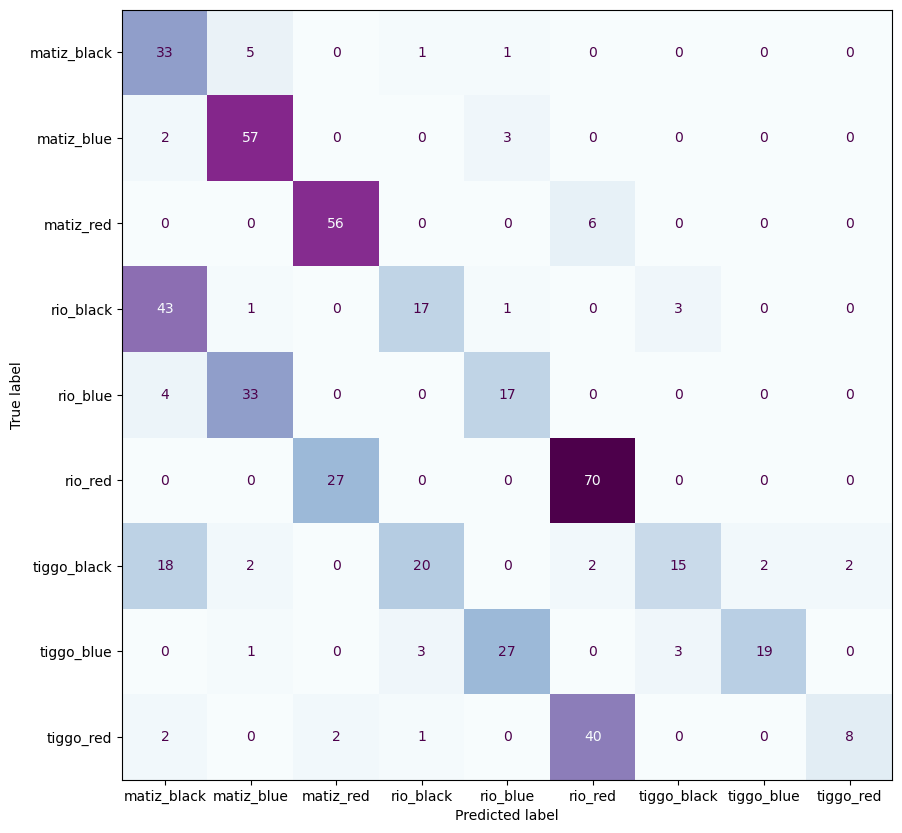

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test , pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = list(classes.values()))

fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax,  cmap = 'BuPu', colorbar = False)